Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

Tips for using SVM for image classification

* You should have image data in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D which i'll be showing later on in this notebook).

* SVM algorithm is to be used when their is shortage of data in our dataset .

* If we have good amount of image data so, we look further for CNN model.


# INFO OF DATASET...!!

The Dataset is named as 'Color Classification' created by Aydin Ayanzadeh. we are provided with images of different color set with labels of color name such as red,blue,etc link :- https://www.kaggle.com/ayanzadeh93/color-classification

**Importing the dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing basic Packages..!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

now,we have provided data directory to DATADIR variable and labels of color set to CATEGORIES variable for further use.

In [3]:
DATADIR = '../input/color-classification/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

Ex. of an sample image is shown below


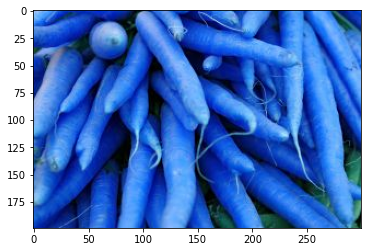

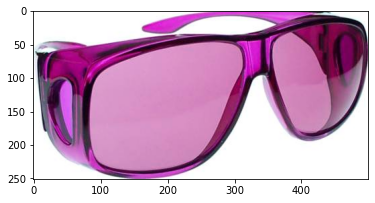

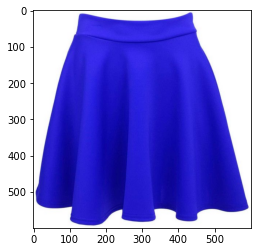

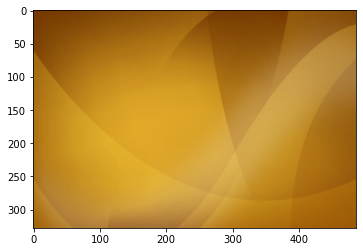

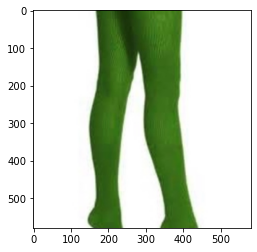

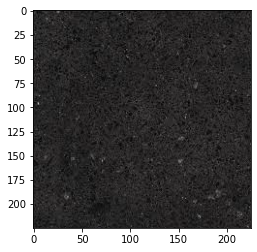

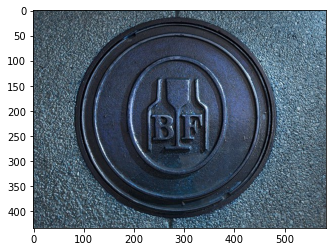

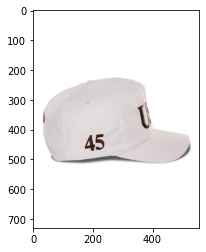

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    #break



orange 0 0
Violet 0 1
red 1 0
Blue 1 1
Green 2 0
Black 2 1
Brown 3 0
White 3 1


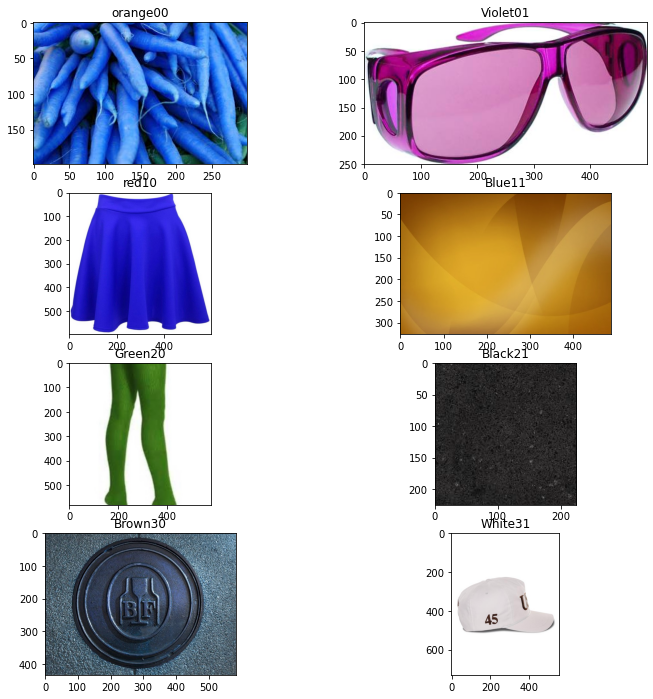

In [5]:
cols=2
rows=4
col_index=0
row_index=0
f, axarr = plt.subplots(rows,cols,figsize=(12, 12))
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        axarr[row_index,col_index].imshow(img_array)
        axarr[row_index,col_index].set_title(category+str(row_index)+str(col_index))
        print(category,row_index,col_index)
        break
    col_index=col_index+1
    if(col_index==cols):
        row_index=row_index+1
        col_index=0
    

performing preprocessing steps...::


In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [7]:
print(len(training_data))

107


storing trainig length for further use.

In [8]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [9]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [10]:
X.shape

(107, 30000)

**flattening the array**

In [11]:
X = X/255.0

Ex. of flattened array...

In [12]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

note : y should be in array form compulsory.


In [13]:
y=np.array(y)

In [14]:
y.shape

(107,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)



**fitting our data in SVM model**

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**predicting the X_test**

In [17]:
y2 = svc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7777777777777778


**Ahhyeah....accuracy of 92.28% which is what we wanted..!!!!**

**fromulating the Classification report**

In [19]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      0.50      0.60         6
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       0.71      1.00      0.83         5
           7       0.75      1.00      0.86         6

    accuracy                           0.78        27
   macro avg       0.74      0.69      0.68        27
weighted avg       0.77      0.78      0.75        27



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [21]:
result

,original,predicted
0,0,0
1,2,2
2,2,2
3,7,7
4,6,6
5,1,6
6,3,3
7,7,7
8,6,6
9,4,3


we have moslty classified all the images correctly with their labels .doing classification on limited dataset is always a challenging task....but by SVM we have dealed with it succesfully

*IF YOU LIKED MY KERNAL PLEASE UPVOTE IT*